In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
from smt.surrogate_models import KRG

In [7]:
def fun(point):
    return np.atleast_2d((point-3.5)*np.sin((point-3.5)/np.pi))

In [8]:
def Ei(model, points, f_min):
    pred = model.predict_values(points)
    # print(pred.shape)
    var = model.predict_variances(points)
    # print(var.shape)
    args0 = (f_min - pred)/np.sqrt(var)
    # print(args0.shape)
    args1 = (f_min - pred)*norm.cdf(args0)
    args2 = np.sqrt(var)*norm.pdf(args0)

    if var.size == 1 and var == 0.0:  # can be use only if one point is computed
        return 0.0
    ei = args1 + args2
    return ei

In [9]:
# def plot(figure, n_iter, k, x, y, label, linestyle=None, marker=None, color=None, ):
#     ax = figure.add_subplot((n_iter + 1) // 2, 2, k + 1)
#     ax.plot(x, y, linestyle=linestyle, marker=marker, label=label)

In [49]:
def train(model, n_iter, data, train_data, x0):
    x_data, y_data = data[0], data[1]
    x_train_data, y_train_data = train_data[0], train_data[1]
    fig = plt.figure(figsize=[10, 10])

    for k in range(n_iter):
        # 找到当前采样数据的最小值y
        y_min_k = np.min(y_train_data)

        # 对当前采样数据进行训练
        model.set_training_values(x_train_data, y_train_data)
        model.train()

        # 将目标函数转为-Ei, 便为求其最小值
        obj_k = lambda x: -Ei(model, np.expand_dims(x, 1), y_min_k)[:, 0]

        # 采用非线性规划求解在不同初始点下的目标函数最小值，
        opt_all = np.array([minimize(obj_k, x0_i, method='SLSQP', bounds=[(0,25)]) for x0_i in x0])
        # 过滤掉未成功的优化
        opt_succ = opt_all[[opt_i["success"] for opt_i in opt_all]]
        # 获取成功优化后的不同初始点下的目标函数最小值
        opt_succ_values = np.array([opt_i["fun"] for opt_i in opt_succ])
        # 寻找所有初始点下，所求较小值里的最小值索引
        obj_min_id = np.argmin(opt_succ_values)
        # 获取最小值对应的x值
        x_k = opt_succ[obj_min_id]["x"]

        y_k = fun(x_k)
        # 更新采样数据
        x_train_data = np.expand_dims(np.append(x_train_data, x_k), 1)
        y_train_data = np.expand_dims(np.append(y_train_data, y_k), 1)

        # 计算第k轮迭代下的模型预测值与模型的ei值
        y_pred_k = model.predict_values(x_data)
        ei_k = Ei(model, x_data, y_min_k)

        # 绘制迭代收敛图
        # fig = plt.figure(figsize=[10, 10])
        ax = fig.add_subplot((n_iter + 1) // 2, 2, k + 1)

        # 绘制函数
        func, = ax.plot(x_data, y_data)
        # 绘制采样点
        sample_data, = ax.plot(x_train_data[:-1, :], y_train_data[:-1, :], linestyle="", marker="o")

        next_point,  = ax.plot(x_train_data[-1], y_train_data[-1], linestyle="", marker="*", color="red")

        pred_data, = ax.plot(x_data, y_pred_k, linestyle="--", color="green")

        ax1 = ax.twinx()
        ei, = ax1.plot(x_data, ei_k, color="purple", label="EI")
        lines = [func, sample_data, next_point, pred_data, ei]
        # 主标题
        fig.suptitle("EGO optimization of $f(x) = x \sin{x}$")
        fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.8)
        fig.legend(lines,
            ['Function', "Sample Data", "Next Point", "Pred Data", "EI"])

        # 副标题
        ax.set_title("iteration {}".format(k + 1))
        # ax.set_xlabel('x')
        # ax.set_ylabel('y')
        # ax1.set_ylabel("ei")
    plt.savefig("./figure/1.pdf", dpi=400, bbox_inches="tight")

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 3
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0369008


C:\Users\79347\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 4
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0438814


C:\Users\79347\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0468748
___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   


C:\Users\79347\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


 Problem size
   
      # training points.        : 6
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0349052


C:\Users\79347\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\79347\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 7
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0408902
___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 8
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0518618


C:\Users\79347\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


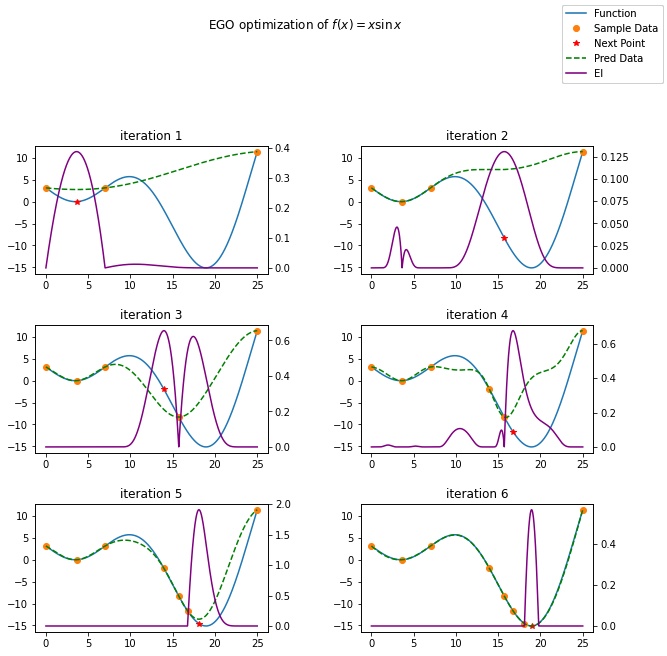

In [50]:
if __name__ == "__main__":
    problem_dim = 1
    model = KRG(theta0=[1e-2]*problem_dim, print_prediction = False, corr='squar_exp')

    x_data = np.expand_dims(np.linspace(0, 25, 10000), 1)
    y_data = fun(x_data)
    data = np.array([x_data, y_data])

    x_train_data = np.expand_dims(np.array([0,7,25]), 1)
    y_train_data = fun(x_train_data)
    train_data = np.array([x_train_data, y_train_data])

    x0 = np.random.rand(20)*25
    train(model, 6, data, train_data, x0)
